# Project on Bagging and Boosting ensemble model

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [2]:
data = pd.read_csv("talking_data.csv")

In [3]:
data.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [4]:
print("Dimension of dataset:", data.shape)
print("Number of rows in the dataset:", data.shape[0])
print("Number of columns in the dataset:", data.shape[1])

Dimension of dataset: (100000, 8)
Number of rows in the dataset: 100000
Number of columns in the dataset: 8


In [5]:
print("Column Names:",data.columns.values)

Column Names: ['ip' 'app' 'device' 'os' 'channel' 'click_time' 'attributed_time'
 'is_attributed']


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ip               100000 non-null  int64 
 1   app              100000 non-null  int64 
 2   device           100000 non-null  int64 
 3   os               100000 non-null  int64 
 4   channel          100000 non-null  int64 
 5   click_time       100000 non-null  object
 6   attributed_time  227 non-null     object
 7   is_attributed    100000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 6.1+ MB


In [7]:
miss_val = data.isna().sum()
miss_val

ip                     0
app                    0
device                 0
os                     0
channel                0
click_time             0
attributed_time    99773
is_attributed          0
dtype: int64

In [8]:
features_na = [features for features in data.columns if data[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(data[feature].isnull().mean(), 4), '% missing values')
else:
    print("no missing value found")

attributed_time 0.9977 % missing values
no missing value found


In [9]:
data.notnull().head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,True,True,True,True,True,True,False,True
1,True,True,True,True,True,True,False,True
2,True,True,True,True,True,True,False,True
3,True,True,True,True,True,True,False,True
4,True,True,True,True,True,True,False,True


In [10]:
data = data.drop(['attributed_time'], axis = 1)
data.head()

,ip,app,device,os,channel,click_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,0
1,105560,25,1,17,259,2017-11-07 13:40:27,0
2,101424,12,1,19,212,2017-11-07 18:05:24,0
3,94584,13,1,13,477,2017-11-07 04:58:08,0
4,68413,12,1,1,178,2017-11-09 09:00:09,0


In [11]:
miss_val = data.isna().sum()
miss_val

ip               0
app              0
device           0
os               0
channel          0
click_time       0
is_attributed    0
dtype: int64

In [12]:
for column in data.columns:
    print(column,data[column].nunique())

ip 34857
app 161
device 100
os 130
channel 161
click_time 80350
is_attributed 2


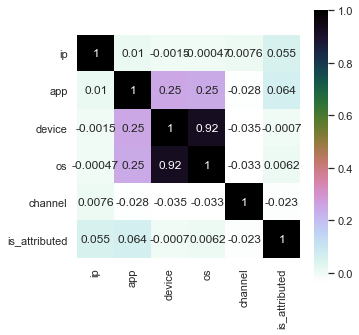

In [13]:
corr = data.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr, annot=True, cmap='cubehelix_r',square=True) 
plt.show()

In [14]:
data['month']=data['click_time'].str[5:7]
data['day']=data['click_time'].str[8:10]
data['year']=data['click_time'].str[:4]
data['click_time1']=data['click_time'].str[10:16]


data.head()

,ip,app,device,os,channel,click_time,is_attributed,month,day,year,click_time1
0,87540,12,1,13,497,2017-11-07 09:30:38,0,11,07,2017,09:30
1,105560,25,1,17,259,2017-11-07 13:40:27,0,11,07,2017,13:40
2,101424,12,1,19,212,2017-11-07 18:05:24,0,11,07,2017,18:05
3,94584,13,1,13,477,2017-11-07 04:58:08,0,11,07,2017,04:58
4,68413,12,1,1,178,2017-11-09 09:00:09,0,11,09,2017,09:00


In [15]:
data = data.drop(['click_time'], axis = 1)
data

,ip,app,device,os,channel,is_attributed,month,day,year,click_time1
0,87540,12,1,13,497,0,11,07,2017,09:30
1,105560,25,1,17,259,0,11,07,2017,13:40
2,101424,12,1,19,212,0,11,07,2017,18:05
3,94584,13,1,13,477,0,11,07,2017,04:58
4,68413,12,1,1,178,0,11,09,2017,09:00
...,...,...,...,...,...,...,...,...,...,...
99995,124883,11,1,19,122,0,11,09,2017,13:25
99996,85150,9,1,13,244,0,11,07,2017,11:25
99997,18839,3,1,13,19,0,11,08,2017,11:38
99998,114276,15,1,12,245,0,11,08,2017,17:55


In [16]:
df_catagoric_features = data.select_dtypes(include=object)
df_catagoric_features.columns

Index(['month', 'day', 'year', 'click_time1'], dtype='object')

In [17]:
dummy_encoded_variables = pd.get_dummies(df_catagoric_features, drop_first=True)
df_numeric_features = data.select_dtypes(include=np.number)

In [18]:
data = pd.concat([df_numeric_features,dummy_encoded_variables], axis=1)
data.head()

,ip,app,device,os,channel,is_attributed,day_07,day_08,day_09,click_time1_ 00:01,...,click_time1_ 23:50,click_time1_ 23:51,click_time1_ 23:52,click_time1_ 23:53,click_time1_ 23:54,click_time1_ 23:55,click_time1_ 23:56,click_time1_ 23:57,click_time1_ 23:58,click_time1_ 23:59
0,87540,12,1,13,497,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,105560,25,1,17,259,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,101424,12,1,19,212,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,94584,13,1,13,477,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,68413,12,1,1,178,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
data.describe()

,ip,app,device,os,channel,is_attributed,day_07,day_08,day_09,click_time1_ 00:01,...,click_time1_ 23:50,click_time1_ 23:51,click_time1_ 23:52,click_time1_ 23:53,click_time1_ 23:54,click_time1_ 23:55,click_time1_ 23:56,click_time1_ 23:57,click_time1_ 23:58,click_time1_ 23:59
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000
mean,91255.879670,12.04788,21.771250,22.818280,268.832460,0.002270,0.323930,0.340350,0.285610,0.000950,...,0.000720,0.000730,0.000790,0.000770,0.000880,0.000660,0.00089,0.000880,0.000700,0.000760
std,69835.553661,14.94150,259.667767,55.943136,129.724248,0.047591,0.467976,0.473829,0.451707,0.030808,...,0.026823,0.027009,0.028096,0.027738,0.029652,0.025682,0.02982,0.029652,0.026448,0.027558
min,9.000000,1.00000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,40552.000000,3.00000,1.000000,13.000000,145.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,79827.000000,12.00000,1.000000,18.000000,258.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,118252.000000,15.00000,1.000000,19.000000,379.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,364757.000000,551.00000,3867.000000,866.000000,498.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [20]:
data.columns

Index(['ip', 'app', 'device', 'os', 'channel', 'is_attributed', 'day_07',
       'day_08', 'day_09', 'click_time1_ 00:01',
       ...
       'click_time1_ 23:50', 'click_time1_ 23:51', 'click_time1_ 23:52',
       'click_time1_ 23:53', 'click_time1_ 23:54', 'click_time1_ 23:55',
       'click_time1_ 23:56', 'click_time1_ 23:57', 'click_time1_ 23:58',
       'click_time1_ 23:59'],
      dtype='object', length=1448)

In [21]:
miss_val[miss_val>0].sort_values(ascending = False)

Series([], dtype: int64)

In [22]:
#pip install xgboost

In [104]:
X = data.iloc[:,:-1]
Y = data.iloc[:, 11]

In [105]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


In [106]:
train, test = train_test_split(data, test_size = .2, random_state = 42)
print(train.shape)
print(test.shape)


(80000, 1448)
(20000, 1448)


In [107]:
#X = data.iloc[:,:-1]
#Y = data.iloc[:, 11]

In [108]:
X_train = data.drop(['is_attributed'], axis=1)
y_train = data['is_attributed']
X_test = data.drop(['is_attributed'], axis=1)
y_test = data['is_attributed']


In [109]:
X_train.shape, y_train.shape

((100000, 1447), (100000,))

In [110]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 3)
kf


KFold(n_splits=3, random_state=None, shuffle=False)

In [111]:
def get_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    return model.score(x_test, y_test)


In [112]:
model = XGBClassifier()
model.fit(X_train, y_train)

[22:59:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [31]:
#print(model)

In [32]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [33]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.95%


In [114]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[99772     1]
 [   50   177]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99773
           1       0.99      0.78      0.87       227

    accuracy                           1.00    100000
   macro avg       1.00      0.89      0.94    100000
weighted avg       1.00      1.00      1.00    100000



In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [116]:
 X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

RandomForestClassifier(max_depth=2, random_state=0)

In [117]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.95%


In [118]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[99772     1]
 [   50   177]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99773
           1       0.99      0.78      0.87       227

    accuracy                           1.00    100000
   macro avg       1.00      0.89      0.94    100000
weighted avg       1.00      1.00      1.00    100000



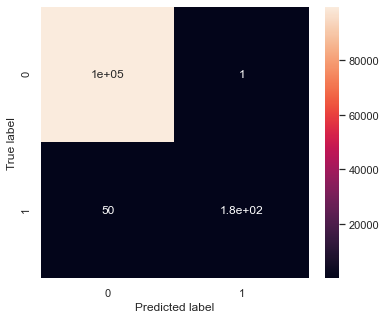

In [119]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [120]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

In [121]:
X_train = data.drop(['is_attributed'], axis=1)
y_train = data['is_attributed']
X_test = data.drop(['is_attributed'], axis=1)
y_test = data['is_attributed']

In [122]:
X_train, Y_train = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, Y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [123]:
clf.score(X, y)

0.983

In [124]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.95%


In [125]:
X=data.iloc[:,:-1].values
y=data.iloc[:,6].values

In [126]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,max_depth=2,criterion="entropy")
clf.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

In [127]:
pred = clf.predict(X_train)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [128]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.95%


In [200]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[99772     1]
 [   50   177]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99773
           1       0.99      0.78      0.87       227

    accuracy                           1.00    100000
   macro avg       1.00      0.89      0.94    100000
weighted avg       1.00      1.00      1.00    100000



In [201]:
d = {'Prediction':y_pred}
pred_comp =pd.DataFrame(d)

pred_comp

,Prediction
0,0
1,0
2,0
3,0
4,0
...,...
99995,0
99996,0
99997,0
99998,0


In [202]:
d = {'Prediction':y_pred}
pred_comp =pd.DataFrame(d)
f = y_test.reset_index()
f = f.drop(['index'], axis=1)
df = pd.concat([pred_comp, f], axis=1)
df.head(1448)

,Prediction,is_attributed
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1443,0,0
1444,0,0
1445,0,0
1446,0,0


In [203]:
f.value_counts()

is_attributed
0                99773
1                  227
dtype: int64

In [209]:
from imblearn.over_sampling import SMOTE
import numpy as np
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)




In [210]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

In [211]:
unique, count = np.unique(y, return_counts=True)# we can see that its balanced now
value_count = {X:y for (X, y) in zip(unique, count)}
value_count

{0: 9900, 1: 100}

In [212]:
print('Dimension of train_x dataframe:',X.shape)
print('Dimension of train_y dataframe:',y.shape)

Dimension of train_x dataframe: (10000, 2)
Dimension of train_y dataframe: (10000,)


In [213]:
np.bincount(y)

array([9900,  100], dtype=int64)

In [214]:
#X = pd.DataFrame(X_test, columns=['ip', 'app', 'device', 'os', 'channel'])
#X = pd.DataFrame(X,columns=['ip', 'app', 'device', 'os', 'channel'])
#y = pd.DataFrame(y, columns=['is_attributed'])

In [215]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

rfe = RFE(estimator=clf)
rfe = rfe.fit(X,y)

In [216]:
print('Dimension of train_x dataframe:',X.shape)
print('Dimension of train_y dataframe:',y.shape)

Dimension of train_x dataframe: (10000, 2)
Dimension of train_y dataframe: (10000,)


In [161]:
np.bincount(y)

array([9900,  100], dtype=int64)